---
**Outline**

1. Review - Introduction to Logistic Regression
2. Model Building
3. Model Interpretation
 - Linear Approximation Interpretation
 - Odds Ratio Interpretation
 - Standardized Parameter Interpretation
 - Predicted Probabilities
4. Significance Testing

In [8]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# <font color='blue'>Review - Introduction to Logistic Regression

# **Model Building*

## **Likelihood Function**
---

The probability of the observed data that expressed as a function
of the parameter $\pi$ (success probability).

In general, **likelihood function** for the identical and independent observations with binary response:

$$
\mathcal{L} = \prod_{i=1}^{n}\pi(x_{i})^{y_{i}}[1-\pi(x_{i})]^{(1-y_{i})}
$$
- If $y_i=1$, the likelihood value for the observation is the success probability itself:
$$
\ell = \pi(x_{i})^{1}[1-\pi(x_{i})]^{0} = \pi(x_{i})
$$
<br>
- Otherwise, $y_i=0$, the likelihood value for the observation is the failure probability:
$$
\ell = \pi(x_{i})^{0}[1-\pi(x_{i})]^{1} = 1-\pi(x_{i})
$$

## **Maximum Likelihood Estimation (MLE)**
---
The maximum likelihood estimate is the parameter value at which the likelihood function takes its maximum value.

- We want the maximum likelihood estimate $\pi(x)$ from the n observations, where:
$$
\pi(x) = \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0}+\beta_{1}x)}}
$$
- To maximize the likelihood function $\mathcal{L}$, we need to find the optimum parameter $\beta_{0}$ and $\beta_{1}$.

## **Negative Log Likelihood (Log Loss)**

- It is easier mathematically to work with the (natural) log of equation.
- So, we transform the likelihood function into **log likelihood function**:
$$
\log(\mathcal{L}(\beta)) = \sum_{i=1}^{n}(y_{i}\log[\pi (x_{i})]+(1-y_{i})\log[1-\pi(x_{i})])
$$
- We want to maximize the log likelihood, but gradient descent optimization works to minimize the cost function.
- Thus, we take the negative value of log likelihood as the cost function.
- The **negative log likelihood (NLL)** or **log loss** is defined as:
$$
\text{NLL}=-\log(\mathcal{L}(\beta)) = -\sum_{i=1}^{n}(y_{i}\log[\pi (x_{i})]+(1-y_{i})\log[1-\pi(x_{i})])
$$

## **Optimization with Gradient Descent**
---
**Our Objective**
- **Minimize** the cost function log loss.

$$
\underset{\beta}{\arg \min} \ \text{NLL}(\beta)
$$

- We find the optimum parameter $\beta_{j}$ where:
$$
\frac{\partial \text N \text L \text L}{\partial \beta_{j}}=0
$$
<br>
- The derivative of log loss or negative log-likelihood (NLL) w.r.t. $\beta_{j}$ is called the gradient of $\beta_{j}$.
$$
\frac{\partial \text N \text L \text L}{\partial \beta_{j}}=-\sum_{i=1}^{n}\left [ y_{i}-\pi(x_{i}) \right ]x_{j},$$ or
$$ \frac{\partial \text N \text L \text L}{\partial \beta_{j}}=\sum_{i=1}^{n}\left[ \pi(x_{i}) - y_{i} \right ]x_{j},$$ with $j=1,2,\dots,p$

# **Model Interpretation**

## **1. Linear Approximation Interpretation**
- Logistic/sigmoid model is curved rather than a straight line.

<img src="https://drive.google.com/uc?id=1PLmvTPnf5DDYEfbmMmshz78yhr0tRxdR" width=250>

1. Logistic/sigmoid model is curved rather than a straight line.
  - That line has slope equal to $\beta \pi(x)[1-\pi(x)]$ for parameter $\beta$.
  - When $\pi(x)$=0 or $\pi(x)$=0, the slope approaches 0.
  - At which level the steepest slope occurs?
    - Answer: at median effective level, when $\pi(x)$=0.5.
    - At median effective level, $\pi(x)$=0.5 has slope $\beta (0.5)[1-(0.5)] = 0.25 \beta$
2. Median effective level is the level at which each
outcome has a 50% chance, or a success is as likely as a failure.
  - Mathematically, median effective level is the $x$ value at which the odds($\pi(x)$)=1 or $\pi(x)$=0.5
  - Median effective level is denoted $EL_{50}$
$$
EL_{50} = -\beta_{0}/\beta_{1}
$$
3. $EL_{50}$ represents the estimated rate of probability change is greatest at the $EL_{50}$ value at which  $\pi(x)$=0.5.
4. In conclusion, **at $EL_{50}$ value, the estimated probability increases at the rate of $0.25 \beta$ per one unit increase in $x$**.

## **2. Odds Ratio Interpretation**

- Remember the logit or log(odds) function:
$$
\text{log(odds)} = \beta_{0}+\beta_{1}x
$$
  - Interpretation: every one unit increase in $x$ implies the increase in $\beta_{1}$ unit in log odds

- To interpret in terms of odds, we transform the log(odds) into odds.
$$
\text {log(odds)} = \beta_{0}+\beta_{1}x
$$
  - Thus,
$$
\begin{align*}
\text {odds} &= e^{(\beta_{0}+\beta_{1}x)} \\
&= e^{\beta_{0}} \left (e^{\beta_{1}} \right )^{x} \\
\end{align*}
$$
  - Interpretation: **the estimated odds of success multiply by $\text{exp}(\beta_{1})$ for one unit increase in $x$.**

## **3. Predicted Probabilities**
---

- Remember odds interpretation:
$$
\text{odds} = \frac{\pi(x)}{1-\pi(x)}
$$
- With success probability $\pi(x)$:
$$
\begin{align*}
\pi(x) &= \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0} +\beta_{1}x)}} \\
&= \frac{e^{\text{log(odds)}}}{1+e^{\text{log(odds)}}} \\
\pi(x) &= \frac{\text{odds}}{\text{1+odds}}
\end{align*}
$$
- $\text{odds}=1$ means
$$
\begin{align*}
\pi(x) &= \frac{\text{odds}}{\text{1+odds}} \\
\pi(x) &= \frac{1}{1+1} \\
\pi(x) &= 0.5 \\
\end{align*}
$$
- Thus,
  - $\text{odds}>1$ implies $\pi(x)>0.5$, and
  - $\text{odds}<1$ implies $\pi(x)<0.5$
- Now we can interpret the decision boundary for logistic model.
  - If $\pi(x)>0.5$, the observation is classified in the success category ($Y=1$),
  - Otherwise $\pi(x) \leq 0.5$, the observation is classified in $Y=0$.

# **Significance Testing**

- The hypotheses:
  - Null Hypothesis: the probability of success $\pi(x)$ is **independent** of $x$.
  - Alternative Hypothesis: the probability of success $\pi(x)$ is **not independent** of $x$.
    - $\text H_{0} : \beta = 0$
    - $\text H_{1} : \beta \neq 0$

- Test statistic:
  - Wald statistic:
  $$
  z = \beta/ \text{SE}$$ or
  - Wald Chi-squared statistic:
  $$
  z^{2}=(\beta/ \text{SE})^{2}$$
  with degree of freedom = 1

- Rejection region:
  - Reject null hypothesis ($\text H_{0}$) if $z>z_{\alpha}$ or $z^{2}>\chi^{2}_\alpha, _{\; \text{df}=1}$, or
  - Reject null hypothesis ($\text H_{0}$) if $\text{P-value}<\alpha$.

# <font color='blue'>Model Building</font>

---
## **0. Let's Prepare the Data**

In [9]:

data = pd.read_csv('data.csv')

In [10]:
data.head()

,Unnamed: 0,Color,Spine,Width,Weight,Satellite
0,0,2,3,28.3,3.05,8
1,1,3,3,26.0,2.60,4
2,2,3,3,25.6,2.15,0
3,3,4,2,21.0,1.85,0
4,4,2,3,29.0,3.00,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  173 non-null    int64  
 1   Color       173 non-null    int64  
 2   Spine       173 non-null    int64  
 3   Width       173 non-null    float64
 4   Weight      173 non-null    float64
 5   Satellite   173 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 8.2 KB


In [12]:
# Code the response variable Satellite
# Satellite=0 --> Satellite=0, otherwise Satellite=1
data['Satellite'] = data['Satellite'].apply(lambda x: 0 if x==0 else 1)

# Use only 2 variables of interest
data = data[['Satellite', 'Width']]

# Data check
data.head()

,Satellite,Width
0,1,28.3
1,1,26.0
2,0,25.6
3,0,21.0
4,1,29.0


---
## **1. Likelihood Function**
In general, **likelihood function** for the identical and independent observations with binary response:

$$
\mathcal{L} = \prod_{i=1}^{n}\pi(x_{i})^{y_{i}}[1-\pi(x_{i})]^{(1-y_{i})}
$$

In [13]:
# Describe the counts of each response category
count_data = data['Satellite'].value_counts()
count_data

1    111
0     62
Name: Satellite, dtype: int64

- Assume $\pi(x_{i}) = 0.5$, $\forall i$.
- Can you calculate the likelihood value from the horseshoe crab observations?

In [15]:
p_success = 0.5
n_success = count_data.loc[1]
n_failed = count_data.loc[0]



In [18]:
likelihood = (p_success**n_success) * ((1-p_success)**n_failed)
# (Prob sukses** jumlah sukses) * (prob gagal ** jumlah gagal)

In [17]:
likelihood

8.352389719038111e-53

In [19]:
# Transform likelihood into log-likelihood
log_likelihood = np.log(likelihood)

log_likelihood

-119.91446223687053

---
## **2. Maximum Likelihood Estimation**
The maximum likelihood estimate is the parameter value at which the likelihood function takes its maximum value.

1. Calculate the likelihood and log-likelihood value when **$\pi(x_{i})$ = 0.4** for $i$=1,2,...173.

In [20]:
p_success_1 = 0.4
n_success_1 = count_data.loc[1]
n_failed_1 = count_data.loc[0]

likelihood_1 = (p_success_1**n_success_1) * ((1-p_success_1)**n_failed_1)
log_likelihood_1 = np.log(likelihood_1)b

log_likelihood_1

-133.37945991152264

2. Calculate the likelihood and log-likelihood value when **$\pi(x_{i})$ = 0.6** for $i$=1,2,...173.

In [21]:
p_success_2 = 0.6
n_success_2 = count_data.loc[1]
n_failed_2 = count_data.loc[0]

likelihood_2 = (p_success_2**n_success_2) * ((1-p_success_2)**n_failed_2)
log_likelihood_2 = np.log(likelihood_2)

log_likelihood_2

-113.51166961422258

**Questions:**
- Which estimate of $\pi(x_{i})$ results in the maximum likelihood/log-likelihood value?
- $\pi(x_{i})$=0.4, $\pi(x_{i})$=0.5, or $\pi(x_{i})$=0.6?
- Explain your answer.

<details>
    <summary><b>Click to see answer</b></summary>

- The estimate of $\pi(x_{i})$=0.6 yields the largest likelihood/log-likelihood value.
- $\pi(x_{i})$ is the estimate of success probability.
- From 173 observations, 111 are success observations (y=1, the crab having any satellite).
- Thus p(success) = 111/173 = 0.64 --> estimate of success probability falls between [0.6,0.7].

**Summary:**
- Make a plot of likelihood/log-likelihood value for each estimate of $\pi(x_{i})$.

In [22]:
# Assign the estimate value of pi in range [0.1,0.9]
pi = np.arange(0.1, 1, 0.1)

pi

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [23]:
# Define the number of success and failed observations
n_success = count_data.loc[1]
n_failed = count_data.loc[0]

# Likelihood function for 173 crabs observations
likelihood = (pi**n_success)*((1-pi)**n_failed)
likelihood

array([1.45557834e-114, 2.54629497e-084, 2.27267720e-068, 1.18586858e-058,
       8.35238972e-053, 5.04090201e-050, 2.44005848e-050, 8.06953087e-055,
       8.33524842e-068])

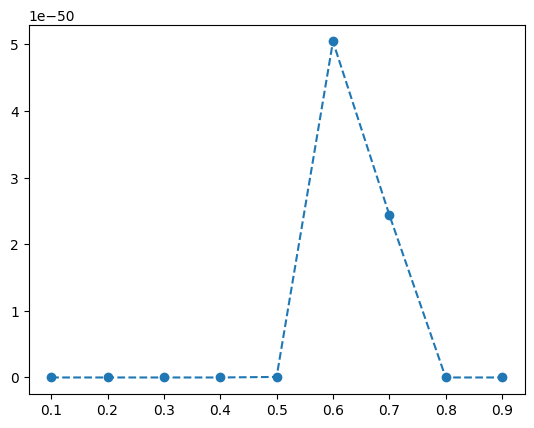

In [24]:
# Plot pi vs likelihood
plt.plot(pi, likelihood, '--o')

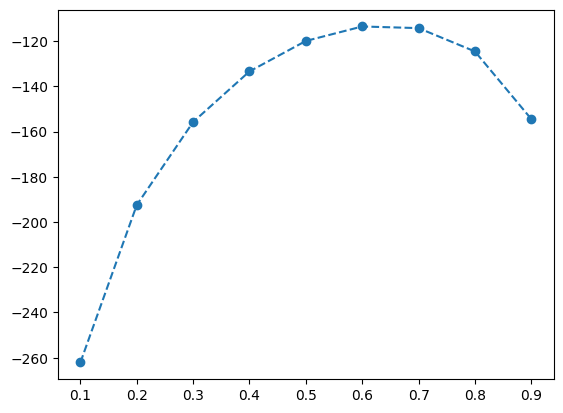

In [25]:
# Calculate log-likelihood
log_likelihood = n_success*np.log(pi) + n_failed*np.log(1-pi)

# Plot pi vs log-likelihood
plt.plot(pi, log_likelihood, '--o')

- The likelihood function for crabs data has its maximum at $\pi(x_{i})$ between 0.6 and 0.7, since the proportion of success is 0.64 of the total observations.

## **3. Optimization with Gradient Descent**

**Remember:**
- We want to maximize likelihood estimate $\pi(x)$ from the n observations, where:
$$
\pi(x) = \frac{e^{(\beta_{0}+\beta_{1}x)}}{1+e^{(\beta_{0}+\beta_{1}x)}}
$$
- Hence, we need to find $\beta_{0}$ and $\beta_{1}$ that maximize the likelihood.
- We call this the optimum $\beta_{0}$ and $\beta_{1}$.
- To find the optimum $\beta_{0}$ and $\beta_{1}$, we maximize the likelihood/log-likelihood function, or we minimize the **negative log-likelihood**:
$$
-\log(\mathcal{L}(\beta)) = -\sum_{i=1}^{n}(y_{i}\log[\pi (x_{i})]+(1-y_{i})\log[1-\pi(x_{i})])
$$
- We find the optimum parameter $\beta_{j}$ where:
$$
\frac{\partial \text{NLL}}{\partial \beta_{j}}=0 \;\;\;\;\;\text o \text r:
$$
$$
\sum_{i=1}^{n}\left [ \pi(x_{i})-y_{i} \right ]x_{j}=0, \;\;\;\;j=1,2,\dots,p
$$

---
**Optimization Algorithm:**
1. Define the response variable ($y$) and the explanatory variable ($X$).
2. Initialize parameter estimate $\beta_{0}=0.0$ and $\beta_{1}=0.0$.
3. Calculate the gradient $\frac{\partial \text {NLL}}{\partial \beta_{j}}$, thus we have the gradient of $\beta_{0}$ and $\beta_{1}$.
4. Update the new $\beta_{0}$ and $\beta_{1}$:
$$
\beta _{j}^{new} = \beta _{j}^{old} - \eta \; \frac{\partial \text{NLL}}{\partial \beta _{j}^{old}}
$$
7. Repeat step 2-4 until converge:
  - $\Delta \beta_{j} < \text{tolerance}$, or
  - $\nabla_{\beta_{j}} \text{NLL} < \text{tolerance}$
    - Note: $\nabla$ is the differential nabla operator or gradient, acting to a differentiable function.